In [1]:
#importing the necessary libraries.
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
# Square Exponential Kernel Function.
def sq_exp_kernel(X1, X2, l=1.0,v=1.0):
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return (np.add(v * np.exp(-0.5 / l**2 * sqdist),np.eye(X1.shape[0],X1.shape[0])*.00001))

# Degree 2 Polynomial Kernel Function.
def poly_kernel(X1, X2, alpha=1.0):
    return (np.add(alpha*((np.dot(X1,X2)+1))**2,np.eye(X1.shape[0],X1.shape[0])*.00001))

# Neuronal Kernel Function.
def neuronal_kernel(X):
    sigma=np.array([[2,0],
           [0,10]])
    lis=[]
    for i in X:
        Xn= np.array([1,i])
        for j in X:
            Xm = np.array([1,j])
            a= 2*(np.dot(np.dot(Xm,sigma),Xn))
            aa = 2*(np.dot(np.dot(Xn,sigma),Xn))
            bb = 2*(np.dot(np.dot(Xm,sigma),Xm))
            res= (2/np.pi)*np.arcsin(float(a)/((float(1+(aa))*(float(1+bb)))**(0.5)))
            lis.append(res)
    cov3 = np.array(lis)
    cov3=cov3.reshape((X.shape[0],X.shape[0]))
    cov3+= np.eye(X.shape[0],X.shape[0])*.00001
    return cov3

In [3]:
# Function to plot.
def plot(mu, cov, X,samples=[]):

    X = X.ravel()

    mu = mu.ravel()

    plt.plot(X, mu, label='Mean')

    for i, sample in enumerate(samples):

        plt.plot(X, sample, lw=1, label=f'Sample {i+1}')
    
    plt.legend()

In [4]:
# Sample of points between -5 and 5. 
X = np.arange(-5, 5, 0.1).reshape(-1, 1)
# Mean and covariance of the gaussian processes.
mu = np.zeros(X.shape)
sq_exp_cov = sq_exp_kernel(X, X) 
poly_cov = poly_kernel(X,X.T) 
neuro_cov = neuronal_kernel(X)

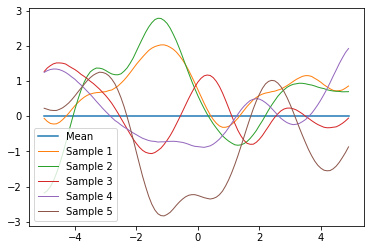

In [5]:
#Plot of GP with square exponential kernel.
samples_3 = np.random.multivariate_normal(mu.ravel(), sq_exp_cov, 5)
plot(mu, sq_exp_cov, X, samples=samples_3)

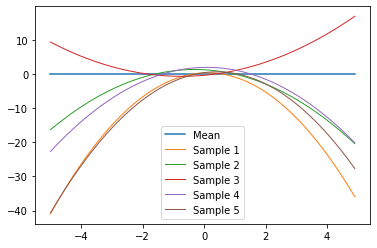

In [6]:
#Plot of GP with polynomial kernel of degree=2.
samples_1 = np.random.multivariate_normal(mu.ravel(),poly_cov , 5)
plot(mu, poly_cov, X, samples=samples_1)

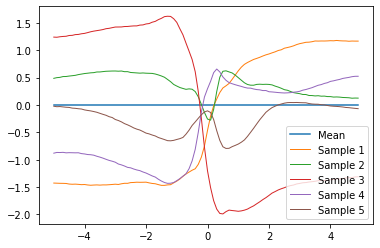

In [12]:
#Plot of GP with neuronal kernel.
samples_2 = np.random.multivariate_normal(mu.ravel(), neuro_cov , 5)
plot(mu, neuro_cov, X, samples=samples_2)